### K-means Clustering 
- k개의 기준은 사용자가 직접 정해주어야 한다.
- k값에 따라서 클러스트의 모양은 다양하게 바뀔 수 있다.
- 초기 중심점의 위치와 K값을 잡아주는 것이 중요하다.
- 다 정해지고 나면 모든 데이터와 중심점 간의 거리를 계산해서 중심점의 위치를 이동

### L1 Norm 
- 1차식을 이용
- 맨해튼 Norm
- 절댓값을 이용하여 계산
### L2 Norm
- 2차식을 이용
- 유클리드 Norm
- 제곱을 이용하여 계산

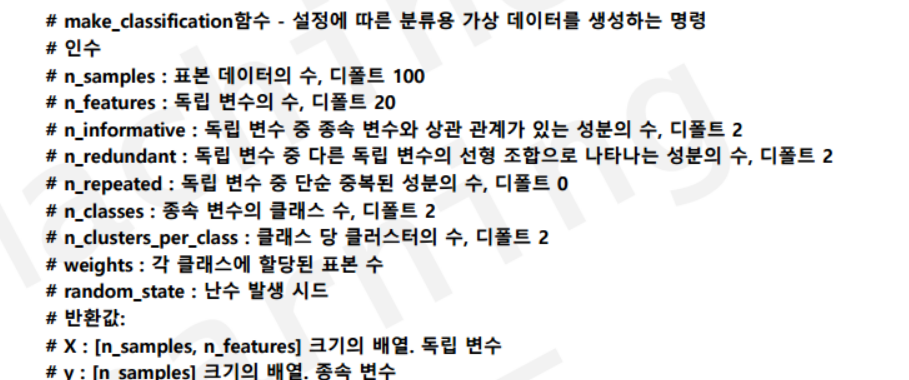

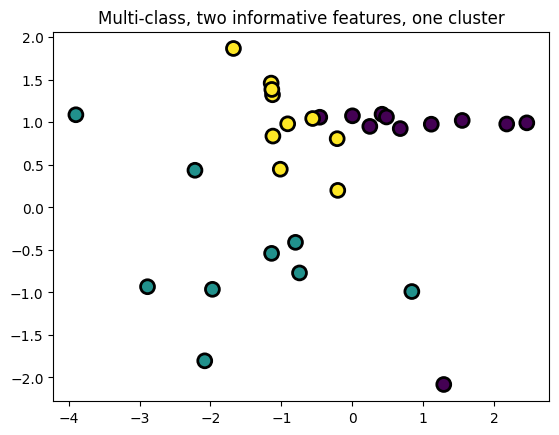

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0, 
n_clusters_per_class=1, n_classes=3, random_state=123) 
# c:y에서 c는 컬러로 각데이터에 대해 y배열(리스트)를 사용
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k', linewidth=2) 
plt.show()

In [2]:
X.shape

(30, 2)

In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init="random") # 모형 생성. n_clusters = 3 (k값이다.)
model.fit(X)
 # init="random" => 임의의 위치를 초기 위치로 잡아줌

KMeans(init='random', n_clusters=3)

In [4]:
model.cluster_centers_ # 중심점의 좌표값

array([[ 1.44565173,  0.2610318 ],
       [-1.96728067, -0.48772003],
       [-0.55984665,  1.04057827]])

In [5]:
pred = model.predict(X) # 데이터가 속하는 클러스터 예측
pred

array([0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 2])

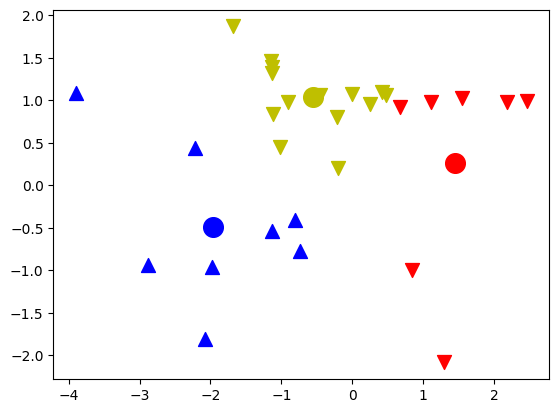

In [6]:
# 모델을 이용해 클러스터링 된 결과를 산점도를 이용해 표시

c0, c1, c2 = model.cluster_centers_ # 각 클러스터의 중심값(평균값).클러스터 수만큼 구해짐/ 각각의 좌표가 c0, c1,c2에 저장이 됨

# 첫번째 클러스터 데이터를 이용한 산점도
plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], s=100, marker="v", c="r") #model.labels_ => 클러스트 값

# 두번째 클러스터 데이터를 이용한 산점도
plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], s=100,marker="^", c="b")

# 세번째 클러스터 데이터를 이용한 산점도
plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], s=100,marker="v", c="y") 

plt.scatter(c0[0], c0[1], s=200, c="r") # 첫번째 클러스터의 중심값
plt.scatter(c1[0], c1[1], s=200, c="b") # 두번째 클러스터의 중심값
plt.scatter(c2[0], c2[1], s=200, c="y") # 세번째 클러스터의 중심값
plt.show()

In [7]:
# norm의 예시이다.
import numpy as np

x = np.random.randint(low = 1, high = 10, size = (3,3)) 
print(x)
print('-----------------------------')
L1_norm = np.linalg.norm(x, axis = 1, ord = 1) # ord = 1은 L1 norm => 맨하튼 방식(절댓값을 이용하여 계산) // axis = 1 => 열을 계산
print(L1_norm)
print('shape:', L1_norm.shape)
L2_norm = np.linalg.norm(x, axis = 1, ord = 2)# ord = 2는 L2 norm. default임
print(L2_norm)
print('shape:', L2_norm.shape)

[[1 5 1]
 [4 7 3]
 [1 6 3]]
-----------------------------
[ 7. 14. 10.]
shape: (3,)
[5.19615242 8.60232527 6.78232998]
shape: (3,)


In [8]:
# X 데이터와 중심점사이의 거리를 측정한 값, 
# 그리고 클러스터링을 통해 할당된 레이블을 하나의 데이터프레임으로 만들어 출력
import pandas as pd
import numpy as np
df = pd.DataFrame(np.hstack([X, # norm =>  norm계산시 사용한다.
    np.linalg.norm(X - c0, axis=1)[:, np.newaxis], # 첫번째 클러스터 중심값과의 거리//  ord방식이 생략되었으면  디폴트 값이 L2 norm이다.
    np.linalg.norm(X - c1, axis=1)[:, np.newaxis], # 두번째 클러스터 중심값과의 거리
    np.linalg.norm(X - c2, axis=1)[:, np.newaxis], # 세번째 클러스터 중심값과의 거리
    model.labels_[:, np.newaxis]]),
    columns=["x0", "x1", "d0", "d1", "d2", "class"])
df

,x0,x1,d0,d1,d2,class
0,1.291320,-2.083269,2.349375,3.628258,3.631148,0.0
1,0.677549,0.926385,1.016207,2.999136,1.242654,0.0
2,0.248341,0.952078,1.382425,2.642347,0.813018,2.0
3,-2.218453,0.436127,3.668286,0.957383,1.765315,1.0
4,-3.898155,1.089007,5.407570,2.492858,3.338659,1.0
5,-2.080478,-1.805009,4.086822,1.322144,3.226405,1.0
6,1.115515,0.977966,0.789294,3.413483,1.676531,0.0
7,-0.203825,0.199599,1.650621,1.892666,0.913234,2.0
8,0.420718,1.095145,1.321451,2.864960,0.982081,2.0
9,-0.457603,1.059832,2.064089,2.161954,0.104040,2.0


In [9]:
# 모델과 데이터를 인수로 받아 산점도와 중심점을 출력할 함수
def plot_clusters(model, data): # 앞의 산점도 그래프 그려놓은 것을 함수로 만들어 놓은 것이다. 
    
    c0, c1, c2 = model.cluster_centers_
    plt.scatter(data[model.labels_ == 0, 0], X[model.labels_ == 0, 1], s=20, marker="v", c="r")
    plt.scatter(data[model.labels_ == 1, 0], X[model.labels_ == 1, 1], s=20, marker="^", c="b")
    plt.scatter(X[model.labels_ == 2, 0], X[model.labels_ == 2, 1], s=100,marker="v", c="y")
    plt.scatter(c0[0], c0[1], s=40, c="r") # 중심점 좌표를 산점도 형식으로 적어놓는 것이다.
    plt.scatter(c1[0], c1[1], s=40, c="b")# 중심점 좌표를 산점도 형식으로 적어놓는 것이다.
    plt.scatter(c2[0], c2[1], s=200, c="y")# 중심점 좌표를 산점도 형식으로 적어놓는 것이다.

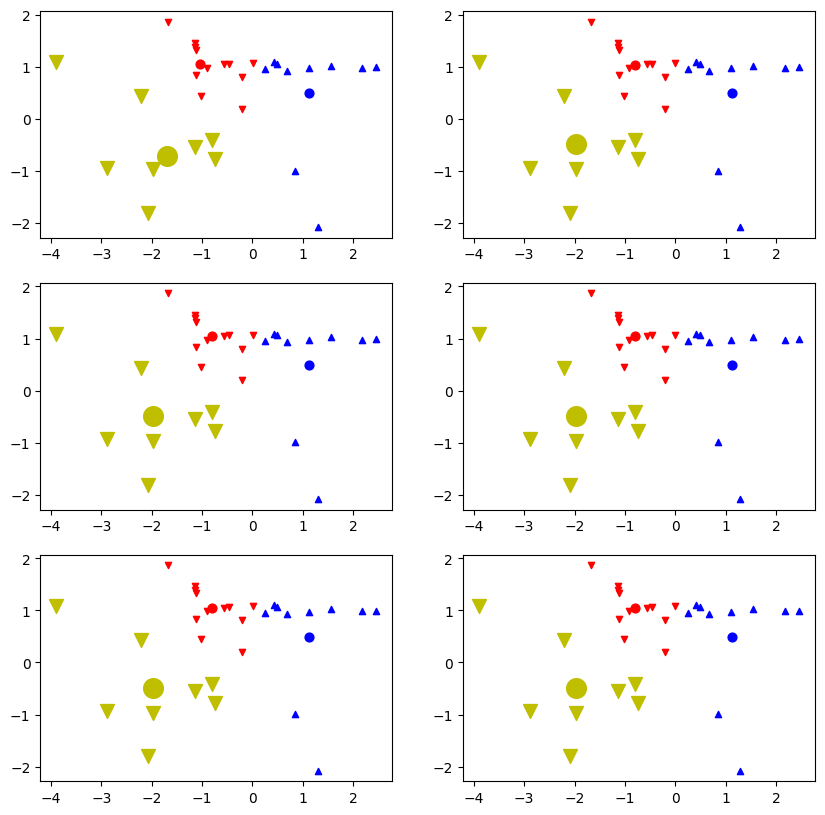

In [10]:

# KMeans 클래스의 max_iter 인자는 최대 학습 횟수를 지정
plt.figure(figsize=(10,10)) # figure 객체를 하나 만들었다.

model1 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1, random_state=1) # max_iter=1 => 반복 횟수를 지정해준다.
model1.fit(X)

plt.subplot(3,2,1)
plot_clusters(model1, X)
model2 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=2, random_state=1)
model2.fit(X)

plt.subplot(3,2,2)
plot_clusters(model2, X)
model3 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=3, random_state=1)
model3.fit(X)

plt.subplot(3,2,3)
plot_clusters(model3, X)
model4 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=4, random_state=1)
model4.fit(X)

plt.subplot(3,2,4)
plot_clusters(model4, X)
model5 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=5, random_state=1)
model5.fit(X)

plt.subplot(3,2,5)
plot_clusters(model5, X)
model6 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=6, random_state=1)
model6.fit(X)

plt.subplot(3,2,6)
plot_clusters(model6, X)
plt.show()


 ### iris 데이터를 사용한  K-means Clustering 만들기

In [11]:
import math
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


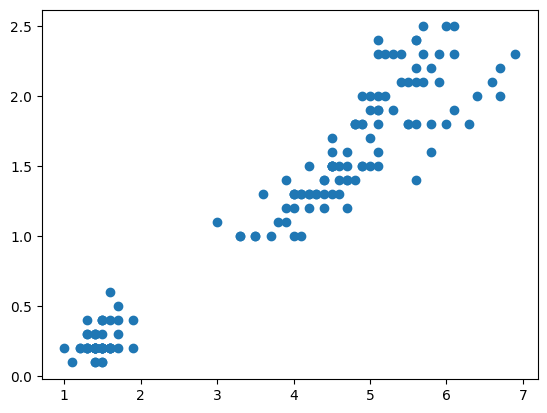

In [12]:
# 'petal length' 와 'petal width' 데이터 2개의 상관 관계

import matplotlib.pyplot as plt
petals = pd.DataFrame(iris_data_pd.values[:, 2:4], columns=['petal length (cm)', 'petal width (cm)'])
plt.scatter(petals.values[:,0], petals.values[:,1])
plt.show()

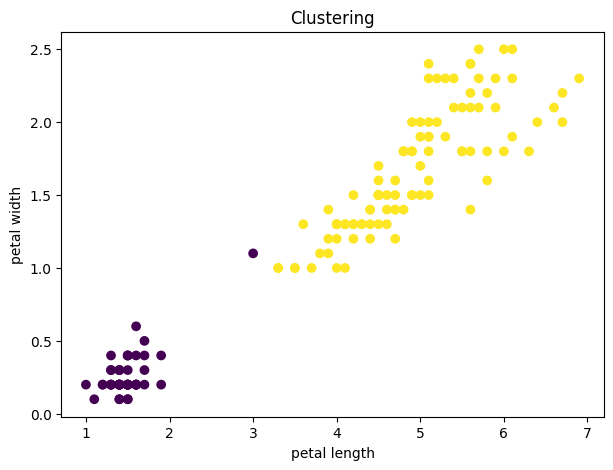

In [13]:
# K=2로 Clustering

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=20) # n_clusters=2 => 현재 n_cluster가 2라고 가정
km.fit(iris_data_pd.iloc[:, 2:4])
y_pred = km.predict(iris_data_pd.iloc[:, 2:4])
plt.figure(figsize=(7,5))
plt.scatter(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], c=y_pred) 
plt.title('Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [14]:
km.predict(iris_data_pd.iloc[:, 2:4])
# 1 중간에 딱 한 놈만 0인데 , 이 0이 바로 혼자 튀어나와있는 저 놈임.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
print(iris_data_pd.iloc[98, 2:4]) # 보라색 중 혼자 멀리 떨어진 놈이다. 

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


In [16]:
# 각 클러스터 기준값 확인
km.cluster_centers_ 

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [18]:

# 유클리드 거리 측정
def distance(x1, y1, x2, y2):
    dx = x2 - x1 # 거리계산
    dy = y2 - y1
    squared = dx**2 + dy**2
    result = math.sqrt(squared) # sqrt => L2 norm
    return result 

In [31]:
# iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3] => 데이터, km.cluster_centers_[0][1] => 0번 클러스터 중심점의 좌표
print('0 cluster distance :', distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3],km.cluster_centers_[0][0], km.cluster_centers_[0][1]))
                         
print('1 cluster distance:', distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3], km.cluster_centers_[1][0], km.cluster_centers_[1][1]))
                                  

0 cluster distance : 1.7246990164733285
1 cluster distance: 2.0112458036464465


### 문제
- bmi.csv에서 상위 100개의 데이터를 가지고 클러스터를 만들어서 출력하기오.
- 출력의 순서: height, weight, cluster_id(cluster_id별로 색상이 다르게 출력되도록)
- 산점도 출력: x = height, y = weight, c = cluster_id
- n_cluster(k) => 3으로 설정하기

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [34]:
df = pd.read_csv('bmi.csv' )
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [67]:
data = df.iloc[:100, 0:2]
data

,height,weight
0,142,62
1,142,73
2,177,61
3,187,48
4,153,60
...,...,...
95,136,51
96,131,37
97,180,75
98,191,60


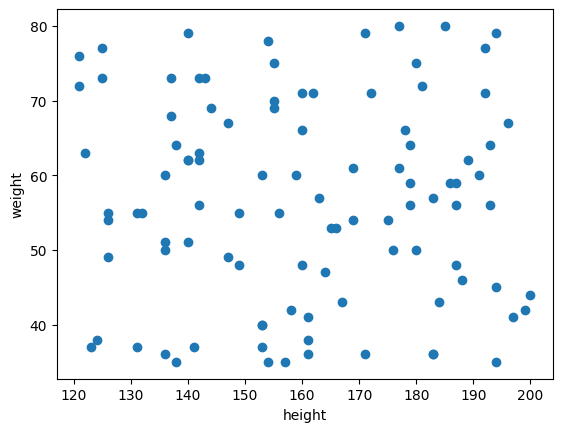

In [73]:
data1 = pd.DataFrame(data.values[:, :], columns=['height', 'weight'])
plt.scatter(data1.values[:,0], data1.values[:,1])
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

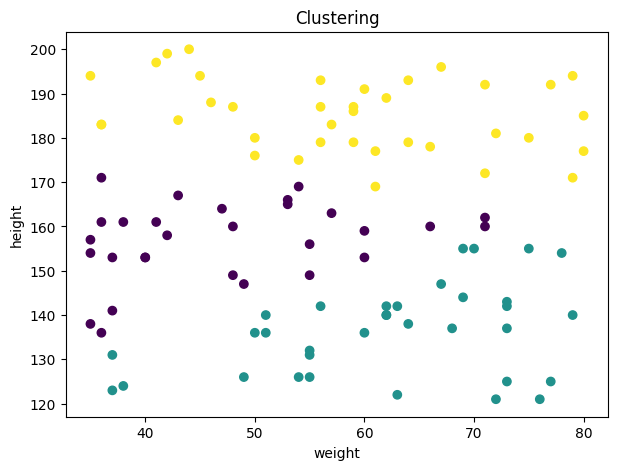

In [83]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=20) 
km.fit(data1.iloc[:, :])
y_pred = km.predict(data1.iloc[:, :])
plt.figure(figsize=(7,5))
plt.scatter(data1.iloc[:, 1], data1.iloc[:, 0:-1], c = y_pred) 
plt.title('Clustering')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

선생님이 한 것

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [90]:
tbl = pd.read_csv('bmi.csv' )
tbl

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [91]:
df = tbl.iloc[:100, 0:2]
df

,height,weight
0,142,62
1,142,73
2,177,61
3,187,48
4,153,60
...,...,...
95,136,51
96,131,37
97,180,75
98,191,60


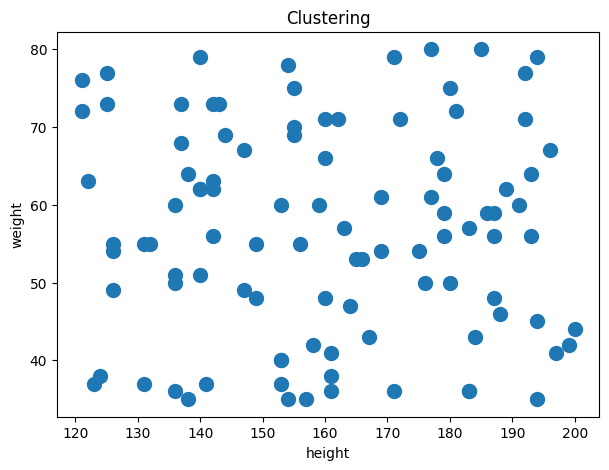

In [93]:
plt.figure(figsize = (7,5))
plt.scatter(df.iloc[:,0], df.iloc[:, 1], s = 100)
plt.title('Clustering')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [95]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'random').fit(df)

In [96]:
kmeans.cluster_centers_

array([[156.75862069,  47.51724138],
       [136.29411765,  62.23529412],
       [185.13513514,  58.40540541]])

In [97]:
kmeans.labels_

array([1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2,
       0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1])

In [98]:
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,142,62,1
1,142,73,1
2,177,61,2
3,187,48,2
4,153,60,0
...,...,...,...
95,136,51,1
96,131,37,1
97,180,75,2
98,191,60,2


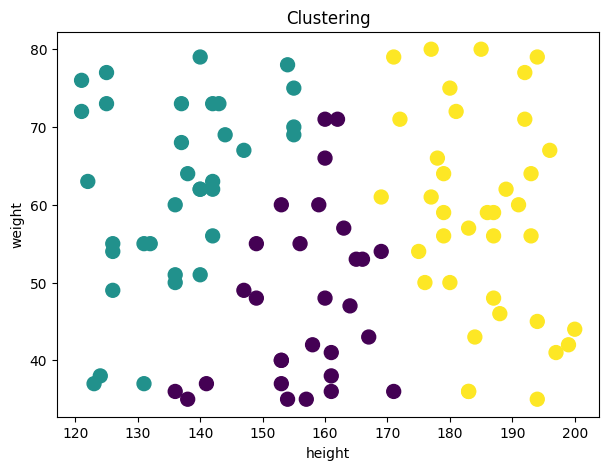

In [100]:
plt.figure(figsize = (7,5))
plt.scatter(df.iloc[:,0], df.iloc[:, 1],c = df['cluster_id'], s = 100)
plt.title('Clustering')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()